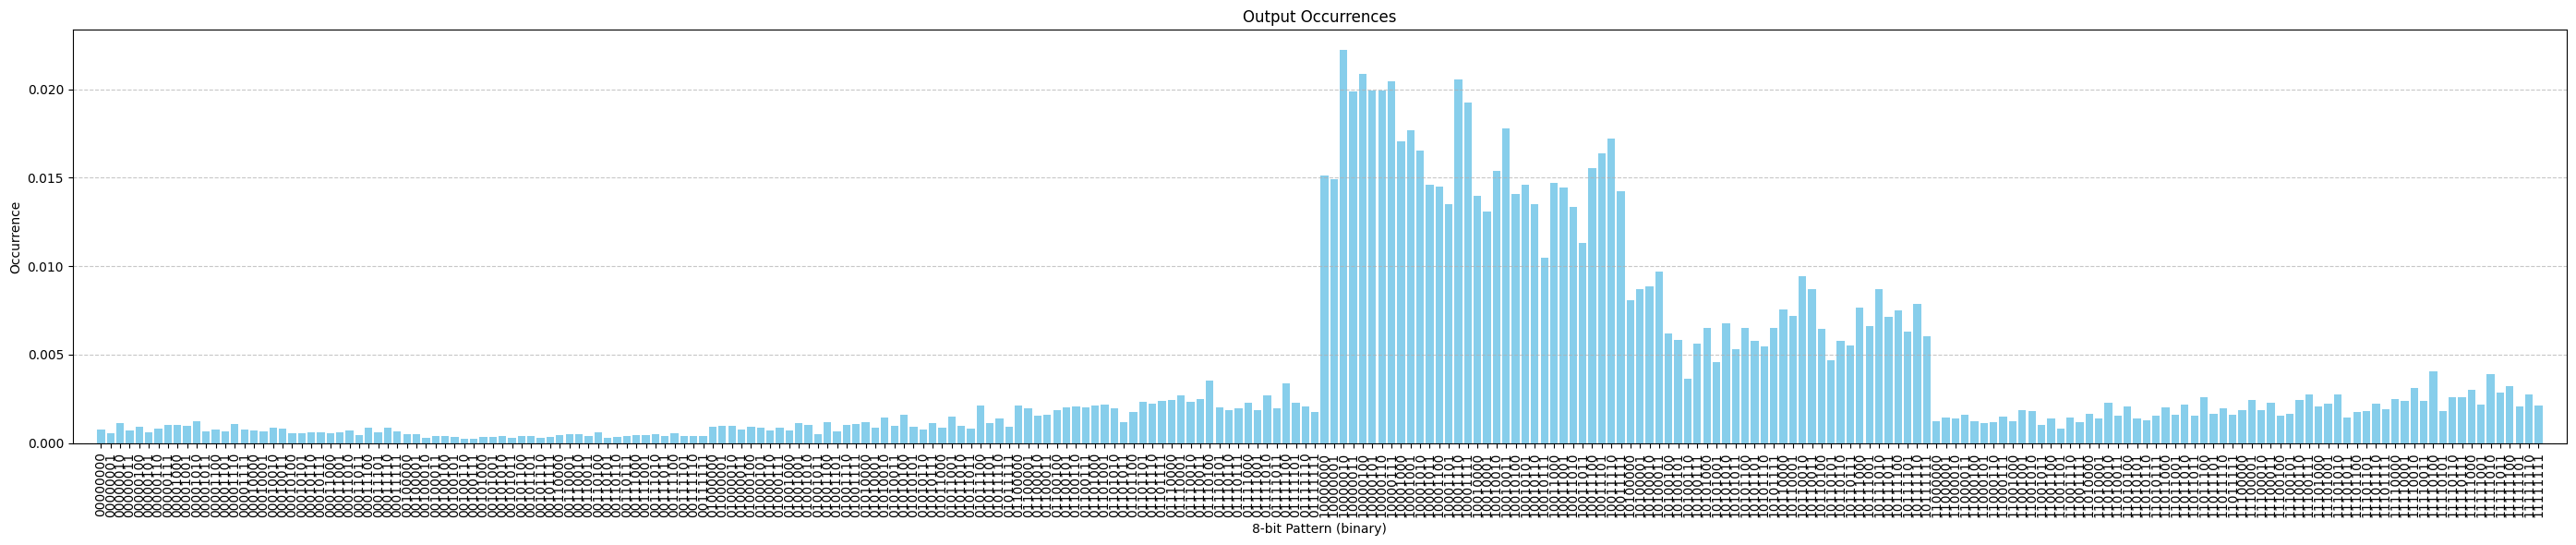

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("8bIntFac_UniqueOccurrences.csv", low_memory=False, dtype={'Pattern': str})
# print(df)
# print(df.head())
# print(df.info())
# Create a bar plot using the "Pattern" as the x-axis and "Occurrence" as the y-axis.
plt.figure(figsize=(28, 6))
plt.bar(df["Pattern"], df["Occurrence"]/df["Occurrence"].sum(), color='skyblue')
plt.xlabel("8-bit Pattern (binary)")
plt.ylabel("Occurrence")
plt.title("Output Occurrences")
plt.margins(x=0.01)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
